---
# Recency, Frequency, Monetary Model with Python
---

### Reference :

https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import squarify
import seaborn as sns

### Dataset

https://www.kaggle.com/fabiendaniel/customer-segmentation/data

In [2]:
online = pd.read_csv('data.csv', encoding = "ISO-8859-1")

In [3]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
print ("All dataset = ", online.dropna().shape[0])
print ("Dataset without null =", online.shape[0])

All dataset =  406829
Dataset without null = 541909


In [5]:
# To obtain datatime value in selected column
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

In [6]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
online['TotalSum'] = online['Quantity'] * online['UnitPrice']

In [8]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
print(online['CustomerID'].nunique())

online['CustomerID'].value_counts()

4372


17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
14351.0       1
13256.0       1
12943.0       1
17923.0       1
13747.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [10]:
print (online['InvoiceDate'].max())
print (online['InvoiceDate'].min())

2011-12-09 12:50:00
2010-12-01 08:26:00


In [11]:
# Create snapshot date with current date (+1)
snapshot_date = online['InvoiceDate'].max() + timedelta(days=1)

In [12]:
print(snapshot_date)

2011-12-10 12:50:00


In [13]:
# Grouping by CustomerID
data_aggregate = online.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

In [14]:
data_aggregate

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


---
## Rechecking the data

In [15]:
# Checking a customer who has 0 TotalSum
online[online['CustomerID'] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


## Checking TotalSum in datatset

In [16]:
# To get TotalSum for the whole dataset
print ("All dataset =", online.TotalSum.sum())

# To get TotalSum for rows (with Null CustomerID)
print ("For Null CustomerID =", online[pd.isnull(online).any(axis=1)]['TotalSum'].sum())

# To get TotalSum for aggregating data
print ("For aggregating data =", data_aggregate.TotalSum.sum())

All dataset = 9747747.933999998
For Null CustomerID = 1447682.1199999996
For aggregating data = 8300065.814


---
## Rename Columns

In [17]:
data_aggregate = data_aggregate.rename(columns={"InvoiceDate":"Recency", "InvoiceNo":"Frequency", "TotalSum":"Monetary"})

In [18]:
data_aggregate.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

## To plot histogram / observe distribution

/Users/cto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

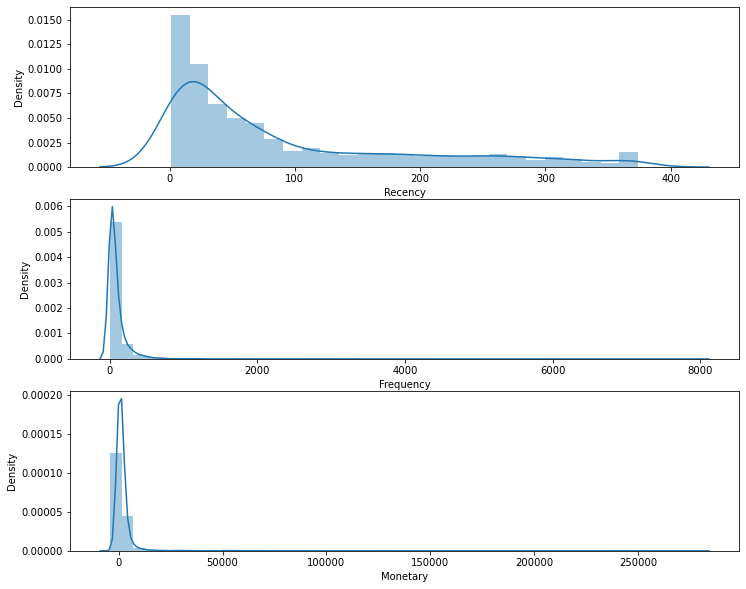

In [19]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1), sns.distplot(data_aggregate["Recency"])
plt.subplot(3,1,2), sns.distplot(data_aggregate["Frequency"])
plt.subplot(3,1,3), sns.distplot(data_aggregate["Monetary"])
plt.show()

In [20]:
# To create labels for R, F, M
R_labels = range(4,0,-1)  # -> will be 4,3,2,1
F_labels = range(1,5)     # -> will be 1,2,3,4
M_labels = range(1,5)

In [21]:
# Assign these labels to percetile groups 
R_groups = pd.qcut(data_aggregate['Recency'], q=4, labels=R_labels)

F_groups = pd.qcut(data_aggregate['Frequency'], q=4, labels=F_labels)

M_groups = pd.qcut(data_aggregate['Monetary'], q=4, labels=M_labels)

In [22]:
data_aggregate = data_aggregate.assign(R = R_groups.values)
data_aggregate = data_aggregate.assign(F = F_groups.values)
data_aggregate = data_aggregate.assign(M = M_groups.values)

In [23]:
data_aggregate

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


In [24]:
# Concat RFM quantile values to create RFM Segments
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

In [25]:
data_aggregate['RFM_Segment_Concat'] = data_aggregate.apply(join_rfm, axis=1)
rfm = data_aggregate
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0
12347.0,2,182,4310.00,4,4,4,4.04.04.0
12348.0,75,31,1797.24,2,2,4,2.02.04.0
12349.0,19,73,1757.55,3,3,4,3.03.04.0
12350.0,310,17,334.40,1,1,2,1.01.02.0


In [26]:
# To count number of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

62


In [27]:
# To calculate for RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

CustomerID
12346.0     3
12347.0    12
12348.0     8
12349.0    10
12350.0     4
Name: RFM_Score, dtype: int64


In [28]:
# To define different RFM levels based on the RFM Scores
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return ("Can\'t losse them")  
    elif (df['RFM_Score'] >= 8) & (df['RFM_Score'] < 9):
        return ("Champions")
    elif (df['RFM_Score'] >= 7) & (df['RFM_Score'] < 8):
        return ("Loyal")
    elif (df['RFM_Score'] >= 6) & (df['RFM_Score'] < 7):
        return ("Promising")
    elif (df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6):
        return ("Potential")
    elif (df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5):
        return ("Need Attention")
    else:
        return ("Required Activation")

In [29]:
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)

In [30]:
rfm.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Required Activation
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Can't losse them
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Champions
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Can't losse them
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Need Attention
12352.0,36,95,1545.41,3,3,3,3.03.03.0,9,Can't losse them
12353.0,204,4,89.00,1,1,1,1.01.01.0,3,Required Activation
12354.0,232,58,1079.40,1,3,3,1.03.03.0,7,Loyal
12355.0,214,13,459.40,1,1,2,1.01.02.0,4,Need Attention


In [31]:
# To calculate mean (median, count) value of each RFM level
rfm_agg = rfm.groupby('RFM_Level').agg({
    'Recency':['mean','median'],
    'Frequency':['mean','median'],
    'Monetary':['mean','count']
}).round(1)

In [32]:
rfm_agg

Recency        Frequency        Monetary      
                       mean median      mean median     mean count
RFM_Level                                                         
Can't losse them       25.2     16     195.1    124   4130.3  1690
Champions              62.7     50      57.0     49    974.7   467
Loyal                  78.8     55      39.7     34    724.2   447
Need Attention        174.5    157      13.9     12    227.1   391
Potential             153.0    148      21.2     19    346.8   517
Promising              94.3     67      28.5     25    491.8   468
Required Activation   264.8    265       7.8      8    109.1   392

In [33]:
rfm_agg.columns = rfm_agg.columns.droplevel()

In [34]:
rfm_agg.columns = ['RecencyMean','RecencyMedian','FreqencyMean','FrequencyMedian','MonetaryMean','MonetaryCount']

In [35]:
rfm_agg.head()

,RecencyMean,RecencyMedian,FreqencyMean,FrequencyMedian,MonetaryMean,MonetaryCount
RFM_Level,,,,,,
Can't losse them,25.2,16,195.1,124,4130.3,1690
Champions,62.7,50,57.0,49,974.7,467
Loyal,78.8,55,39.7,34,724.2,447
Need Attention,174.5,157,13.9,12,227.1,391
Potential,153.0,148,21.2,19,346.8,517


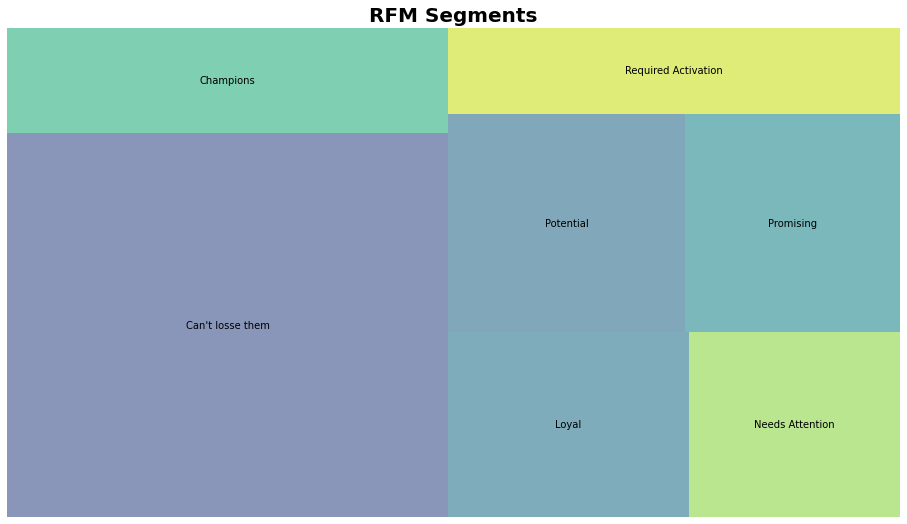

In [36]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16,9)

squarify.plot(sizes=rfm_agg['MonetaryCount'], 
              label=['Can\'t losse them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Required Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

In [37]:
rfm_agg

,RecencyMean,RecencyMedian,FreqencyMean,FrequencyMedian,MonetaryMean,MonetaryCount
RFM_Level,,,,,,
Can't losse them,25.2,16,195.1,124,4130.3,1690
Champions,62.7,50,57.0,49,974.7,467
Loyal,78.8,55,39.7,34,724.2,447
Need Attention,174.5,157,13.9,12,227.1,391
Potential,153.0,148,21.2,19,346.8,517
Promising,94.3,67,28.5,25,491.8,468
Required Activation,264.8,265,7.8,8,109.1,392
